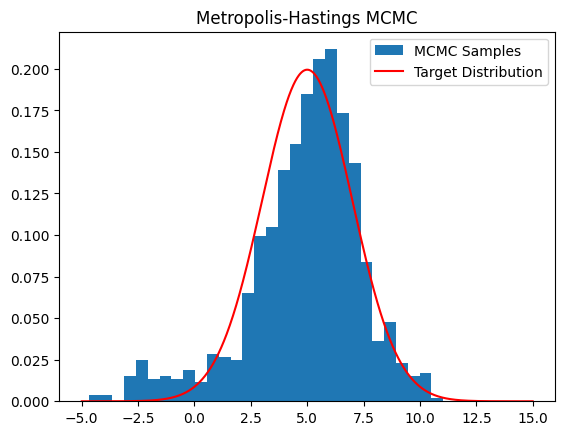

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution (univariate normal)
def target_distribution(x, mu=5, sigma=2):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Proposal distribution (normal)
def propose(x, sigma_proposal=1):
    return np.random.normal(x, sigma_proposal)

# Metropolis-Hastings algorithm
def metropolis_hastings(num_samples, initial_state, sigma_proposal):
    samples = [initial_state]

    for _ in range(num_samples - 1):
        current_state = samples[-1]
        proposed_state = propose(current_state, sigma_proposal)

        # Calculate acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_state) / target_distribution(current_state))

        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            samples.append(proposed_state)
        else:
            samples.append(current_state)

    return np.array(samples)

# Number of samples
num_samples = 1000

# Initial state
initial_state = 0

# Proposal standard deviation
sigma_proposal = 1

# Generate samples using Metropolis-Hastings algorithm
samples = metropolis_hastings(num_samples, initial_state, sigma_proposal)

# Plot the results
plt.hist(samples, bins=30, density=True, label='MCMC Samples')
x_range = np.linspace(-5, 15, 1000)
plt.plot(x_range, target_distribution(x_range), 'r', label='Target Distribution')
plt.title('Metropolis-Hastings MCMC')
plt.legend()
plt.show()
